In [11]:
from keras.datasets import mnist
from keras.layers import Input,Dense, Conv2D, MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as k
from keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

<Figure size 1440x144 with 0 Axes>

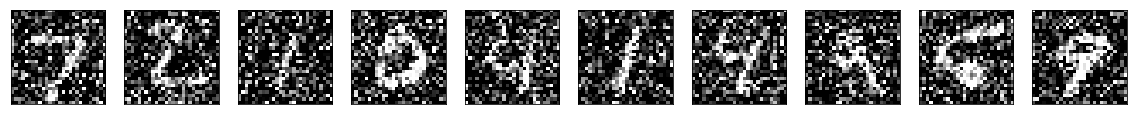

In [6]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [12]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 133s - loss: 0.2052 - acc: 0.7974 - val_loss: 0.1356 - val_acc: 0.8022
Epoch 2/100
60000/60000 [==============================] - 149s - loss: 0.1261 - acc: 0.8089 - val_loss: 0.1162 - val_acc: 0.8092
Epoch 3/100
60000/60000 [==============================] - 153s - loss: 0.1163 - acc: 0.8106 - val_loss: 0.1137 - val_acc: 0.8118
Epoch 4/100
60000/60000 [==============================] - 150s - loss: 0.1115 - acc: 0.8114 - val_loss: 0.1074 - val_acc: 0.8105
Epoch 5/100
60000/60000 [==============================] - 156s - loss: 0.1085 - acc: 0.8119 - val_loss: 0.1068 - val_acc: 0.8100
Epoch 6/100
60000/60000 [==============================] - 151s - loss: 0.1066 - acc: 0.8122 - val_loss: 0.1053 - val_acc: 0.8103
Epoch 7/100
60000/60000 [==============================] - 137s - loss: 0.1051 - acc: 0.8124 - val_loss: 0.1045 - val_acc: 0.8124
Epoch 8/100
60000/60000 [===============

60000/60000 [==============================] - 158s - loss: 0.0950 - acc: 0.8136 - val_loss: 0.0951 - val_acc: 0.8129
Epoch 64/100
60000/60000 [==============================] - 160s - loss: 0.0950 - acc: 0.8136 - val_loss: 0.0950 - val_acc: 0.8122
Epoch 65/100
60000/60000 [==============================] - 163s - loss: 0.0950 - acc: 0.8136 - val_loss: 0.0952 - val_acc: 0.8121
Epoch 66/100
60000/60000 [==============================] - 163s - loss: 0.0950 - acc: 0.8136 - val_loss: 0.0950 - val_acc: 0.8121
Epoch 67/100
60000/60000 [==============================] - 141s - loss: 0.0949 - acc: 0.8136 - val_loss: 0.0946 - val_acc: 0.8123
Epoch 68/100
60000/60000 [==============================] - 137s - loss: 0.0949 - acc: 0.8136 - val_loss: 0.0951 - val_acc: 0.8121
Epoch 69/100
60000/60000 [==============================] - 140s - loss: 0.0948 - acc: 0.8136 - val_loss: 0.0943 - val_acc: 0.8126
Epoch 70/100
60000/60000 [==============================] - 142s - loss: 0.0948 - acc: 0.8136 - 

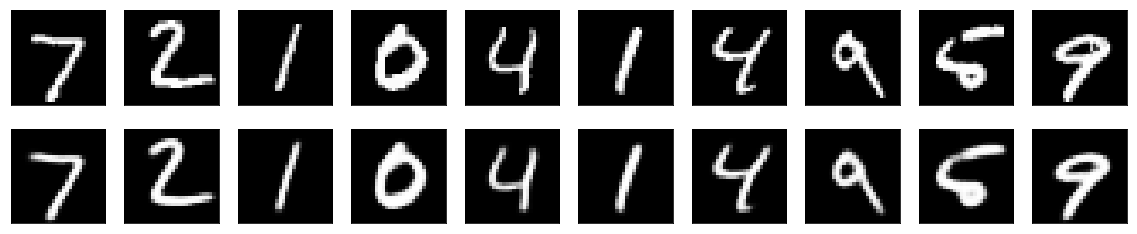

In [13]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()